# Blds indicators

Question: Exists any relation between the Microsoft AI buildings and selected indicators?

#### Import libs

In [1]:
# turn the warnings off
import warnings
warnings.filterwarnings('ignore')
# Suppress all UserWarnings
warnings.simplefilter('ignore', category=UserWarning)

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob


#### Load Microsoft AI buildings data by region

In [3]:
# get the directory with downloaded data
os.chdir("..")
home_dir = os.getcwd()
data_dir = os.path.join(home_dir, "downloaded-data-json")


In [4]:
def get_json_names():

    """
    Get the names of the json files in the downloaded-data-json directory
    """

    home_dir = os.getcwd()
    json_dir = os.path.join(home_dir, f"downloaded-data-json", "")

    # Construct the file pattern
    file_pattern = os.path.join(json_dir, '*.json')
    # print(file_pattern)

    # Use glob to get the list of file names matching the pattern
    file_names = glob.glob(file_pattern)
    # print(file_names)

    # Extract the base names of the files without the extension
    names = [os.path.splitext(os.path.basename(file_name))[0]
            for file_name in file_names]
    # print(names)
    
    # Print the names
    return names
    

json_names = get_json_names()
json_names


['blds_world-states-2024']

In [5]:
json_dic = {k: v for k, v in enumerate(json_names)}
json_dic


{0: 'blds_world-states-2024'}

In [6]:
# define the user input

while True:
    if bool(json_dic):
        try:
            user_d_spec = int(input(f"Which data do you want to process?\
                                Enter {json_dic}"
                                    ))
        except ValueError:
            print("Please enter a number.")
            continue
        if user_d_spec not in range(len(json_dic)):
            print(f"Please enter {len(json_dic.keys())}")
            continue
        break
    else:
        print("Geojson_dic is empty, restart the kernel, please.")
        break



In [7]:
def data_spec(data_dic):

    """
    Load the data from the json file
    """

    try:
        with open(f"downloaded-data-json\\{data_dic}.json", "r") as f:
            data = json.load(f)
        return data
    except Exception as e:
        print(e)
        print("Please download the data first.")

data = data_spec(json_dic[user_d_spec])
# data


In [8]:
# get the header properties
header_properties = ["name_en", "source", "adm0_iso", "sovereignt", "type_", "admin", "geounit", "name", "ne_id", "pop_est",
                     "pop_rank", "pop_year", "gdp_md", "gdp_year", "economy", "income_grp", "continent", "region_un", "subregion", "region_wb",
                     "timestamp", "value"]

# create a dictionary with the header properties
d = {k: list() for k in header_properties}
d

{'name_en': [],
 'source': [],
 'adm0_iso': [],
 'sovereignt': [],
 'type_': [],
 'admin': [],
 'geounit': [],
 'name': [],
 'ne_id': [],
 'pop_est': [],
 'pop_rank': [],
 'pop_year': [],
 'gdp_md': [],
 'gdp_year': [],
 'economy': [],
 'income_grp': [],
 'continent': [],
 'region_un': [],
 'subregion': [],
 'region_wb': [],
 'timestamp': [],
 'value': []}

In [9]:
data

[[{'groupByObject': ['Indonesia',
    'remainder',
    'IDN',
    'Indonesia',
    'Sovereign country',
    'Indonesia',
    'Indonesia',
    'Indonesia',
    1159320845,
    270625568.0,
    17,
    2019,
    1119190,
    2019,
    '4. Emerging region: MIKT',
    '4. Lower middle income',
    'Asia',
    'Asia',
    'South-Eastern Asia',
    'East Asia & Pacific'],
   'result': [{'timestamp': '2018-01-01T00:00:00Z', 'value': 11987966.0},
    {'timestamp': '2019-01-01T00:00:00Z', 'value': 24924151.0},
    {'timestamp': '2020-01-01T00:00:00Z', 'value': 26423299.0},
    {'timestamp': '2021-01-01T00:00:00Z', 'value': 30570946.0},
    {'timestamp': '2022-01-01T00:00:00Z', 'value': 36251875.0},
    {'timestamp': '2023-01-01T00:00:00Z', 'value': 38586511.0},
    {'timestamp': '2024-01-01T00:00:00Z', 'value': 39490780.0}]},
  {'groupByObject': ['Indonesia',
    'source=microsoft/BuildingFootprints',
    'IDN',
    'Indonesia',
    'Sovereign country',
    'Indonesia',
    'Indonesia',
    'In

In [10]:
"""
In this modified code, we check the length of the current list (d[key])
 against the length of the "timestamp" list (d["timestamp"]).
 If the current list is longer, we append the corresponding "timestamp"
 and "value" to ensure they have the same length. If the current list is shorter,
 we update the value at the corresponding index in the "timestamp" and "value" lists
 instead of appending new elements.
 
"""

for region in data:
    temp_dic = {}
    temp_keys = header_properties[0:-2]

    for dic in region:
        for idx, key in enumerate(temp_keys):
            temp_dic[key] = dic["groupByObject"][idx]

            for res in dic["result"]:
                if key not in d:
                    d[key] = []

                d[key].append(temp_dic[key])

                if len(d[key]) > len(d["timestamp"]):
                    d["timestamp"].append(res["timestamp"])
                    d["value"].append(res["value"])
                else:
                    d["timestamp"][len(d[key])-1] = res["timestamp"]
                    d["value"][len(d[key])-1] = res["value"]

df = pd.DataFrame(d)

In [11]:
# convert the timestamp to datetime
df["blds_year"] = pd.to_datetime(df["timestamp"]).dt.year

# rename the value column to num_of_blds
df.rename(columns={"value": "num_of_blds"}, inplace=True)

In [12]:
# check the data types
df.dtypes

name_en         object
source          object
adm0_iso        object
sovereignt      object
type_           object
admin           object
geounit         object
name            object
ne_id            int64
pop_est        float64
pop_rank         int64
pop_year         int64
gdp_md           int64
gdp_year         int64
economy         object
income_grp      object
continent       object
region_un       object
subregion       object
region_wb       object
timestamp       object
num_of_blds    float64
blds_year        int32
dtype: object

In [13]:
# list the column names
df.columns

Index(['name_en', 'source', 'adm0_iso', 'sovereignt', 'type_', 'admin',
       'geounit', 'name', 'ne_id', 'pop_est', 'pop_rank', 'pop_year', 'gdp_md',
       'gdp_year', 'economy', 'income_grp', 'continent', 'region_un',
       'subregion', 'region_wb', 'timestamp', 'num_of_blds', 'blds_year'],
      dtype='object')

In [14]:
pd.set_option('display.max_rows', None)

In [15]:
# reet view all rows of the dataframe
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [16]:
# check for missing values
df.loc[:, ["name_en", "blds_year", "num_of_blds"]].isna().sum()

name_en        0
blds_year      0
num_of_blds    0
dtype: int64

In [17]:
# df with selected columns
df_blds_sel = df.loc[:, ["name_en", "adm0_iso", "blds_year", "source", "num_of_blds"]]
df_blds_sel

,name_en,adm0_iso,blds_year,source,num_of_blds
0,Indonesia,IDN,2018,remainder,11987966.0
1,Indonesia,IDN,2019,remainder,24924151.0
2,Indonesia,IDN,2020,remainder,26423299.0
3,Indonesia,IDN,2021,remainder,30570946.0
4,Indonesia,IDN,2022,remainder,36251875.0
...,...,...,...,...,...
4349,Scarborough Shoal,-99,2020,source=esri/Google_Africa_Buildings,0.0
4350,Scarborough Shoal,-99,2021,source=esri/Google_Africa_Buildings,0.0
4351,Scarborough Shoal,-99,2022,source=esri/Google_Africa_Buildings,0.0
4352,Scarborough Shoal,-99,2023,source=esri/Google_Africa_Buildings,0.0


In [18]:
# sum of the all buildings
df_blds_sel["sum_all_blds"] = df_blds_sel.groupby(["name_en", "blds_year"])["num_of_blds"].transform("sum")

In [19]:
# percentage of the buildings
df_blds_sel["percentage_blds"] = (df_blds_sel["num_of_blds"] / df_blds_sel["sum_all_blds"]) * 100

In [20]:
df_blds_sel

,name_en,adm0_iso,blds_year,source,num_of_blds,sum_all_blds,percentage_blds
0,Indonesia,IDN,2018,remainder,11987966.0,11987966.0,100.0
1,Indonesia,IDN,2019,remainder,24924151.0,24924151.0,100.0
2,Indonesia,IDN,2020,remainder,26423299.0,26423299.0,100.0
3,Indonesia,IDN,2021,remainder,30570946.0,30570946.0,100.0
4,Indonesia,IDN,2022,remainder,36251875.0,36251875.0,100.0
...,...,...,...,...,...,...,...
4349,Scarborough Shoal,-99,2020,source=esri/Google_Africa_Buildings,0.0,0.0,NaN
4350,Scarborough Shoal,-99,2021,source=esri/Google_Africa_Buildings,0.0,0.0,NaN
4351,Scarborough Shoal,-99,2022,source=esri/Google_Africa_Buildings,0.0,0.0,NaN
4352,Scarborough Shoal,-99,2023,source=esri/Google_Africa_Buildings,0.0,0.0,NaN


In [21]:
# numbers of buildings by source
df_blds_sel[['source']].value_counts()

source                             
source=esri/Google_Africa_Buildings    1463
source=microsoft/BuildingFootprints    1463
remainder                              1428
Name: count, dtype: int64

In [22]:
df_blds_sel.loc[(df_blds_sel['adm0_iso'] == 'TUR')
                & (df_blds_sel['blds_year'] == 2024)
                ]

,name_en,adm0_iso,blds_year,source,num_of_blds,sum_all_blds,percentage_blds
1329,Turkey,TUR,2024,remainder,3542783.0,4283278.0,82.711956
1336,Turkey,TUR,2024,source=microsoft/BuildingFootprints,740495.0,4283278.0,17.288044
1343,Turkey,TUR,2024,source=esri/Google_Africa_Buildings,0.0,4283278.0,0.000000


In [23]:
t = df_blds_sel.loc[(df_blds_sel['adm0_iso'] == 'MAR')
                & (df_blds_sel['blds_year'] == 2024)
                ]

t

,name_en,adm0_iso,blds_year,source,num_of_blds,sum_all_blds,percentage_blds
531,Morocco,MAR,2024,remainder,916394.0,1120364.0,81.79431
538,Morocco,MAR,2024,source=microsoft/BuildingFootprints,203970.0,1120364.0,18.20569
545,Morocco,MAR,2024,source=esri/Google_Africa_Buildings,0.0,1120364.0,0.00000


In [24]:
df_blds_sel.loc[(df_blds_sel['adm0_iso'] == 'TZA')
                & (df_blds_sel['blds_year'] == 2024)]

,name_en,adm0_iso,blds_year,source,num_of_blds,sum_all_blds,percentage_blds
363,Tanzania,TZA,2024,remainder,14051733.0,14335699.0,98.019169
370,Tanzania,TZA,2024,source=microsoft/BuildingFootprints,283930.0,14335699.0,1.980580
377,Tanzania,TZA,2024,source=esri/Google_Africa_Buildings,36.0,14335699.0,0.000251


#### Load indicators data (e.g. HDI, GDP)

In [25]:
# read the folder with indicators data
indicators_data_dir = os.path.join(home_dir, "indicators-data")

In [26]:
# read the gdp data and select relevant columns
gdp = pd.read_excel(f"{indicators_data_dir}\\gdp_world_countries_timeseries.xls", sheet_name="Data", skiprows=3)

# select relevant columns from the gdp data (newer data are not available - only the year 2022)
gdp = gdp.loc[:, ["Country Name", "Country Code", "2018", "2019", "2020", "2021", "2022"]]
gdp.columns

Index(['Country Name', 'Country Code', '2018', '2019', '2020', '2021', '2022'], dtype='object')

In [27]:
# read the hdi data and select relevant columns
hdi = pd.read_excel(f"{indicators_data_dir}\\hdi_world_countries_timeseries.xlsx")

# cols to select (newer data are not available - only the year 2021)
hdi_cols_sel = ['iso3', 'country', 'hdicode', 'region', 'hdi_2018', 'hdi_2019', 'hdi_2020', 'hdi_2021']

# select the columns
hdi = hdi.loc[:, hdi_cols_sel]

hdi.columns

Index(['iso3', 'country', 'hdicode', 'region', 'hdi_2018', 'hdi_2019',
       'hdi_2020', 'hdi_2021'],
      dtype='object')

In [28]:
hdi.columns.to_list()

['iso3',
 'country',
 'hdicode',
 'region',
 'hdi_2018',
 'hdi_2019',
 'hdi_2020',
 'hdi_2021']

### Buildings X GDP

#### 1. version of the scatterplot (GDP)
- one year of the data (2022)
- x-axis: Microsoft AI buildings
- y-axis: selected indicator

##### Transform the data

In [29]:
# select the gdp data from the year 2022 and create the df
gdp_2022 = gdp[['Country Name', 'Country Code', '2022']]
gdp_2022

,Country Name,Country Code,2022
0,Aruba,ABW,33300.838819
1,Africa Eastern and Southern,AFE,1644.062829
2,Afghanistan,AFG,NaN
3,Africa Western and Central,AFW,1785.312219
4,Angola,AGO,3000.444231
...,...,...,...
261,Kosovo,XKX,5340.268798
262,"Yemen, Rep.",YEM,650.272218
263,South Africa,ZAF,6766.481254
264,Zambia,ZMB,1456.901570


In [30]:
# select the ai blds data from the year 2024 and create the df
ai_blds_2024 = df_blds_sel.loc[(df_blds_sel['blds_year'] == 2024)
           & (df_blds_sel['source'] == "source=microsoft/BuildingFootprints")
           & ~(df_blds_sel['adm0_iso'] == 'USA') # exclude USA as a extreme value
           , :]

In [31]:
# check the number of buildings by country in the year 2022
ai_blds_2024.groupby(['name_en', 'adm0_iso']).agg({'num_of_blds': 'sum'}).reset_index()

,name_en,adm0_iso,num_of_blds
0,Abkhazia,GEO,37248.0
1,Afghanistan,AFG,3557.0
2,Albania,ALB,42081.0
3,Algeria,DZA,1123493.0
4,Andorra,AND,0.0
...,...,...,...
203,Wake Island,-99,0.0
204,Western Sahara,B28,0.0
205,Yemen,YEM,569.0
206,Zambia,ZMB,163473.0


In [32]:
# check how many countries have buildings in the year 2022
len(ai_blds_2024.loc[~(ai_blds_2024['num_of_blds'] == 0), :])

170

In [33]:
# set the option to view all rows
pd.set_option('display.max_rows', None)

In [34]:
# reset the option to view all rows
pd.reset_option('display.max_rows')

In [35]:
# sort the ai_blds_2022 by name_en
ai_blds_2024.sort_values(by="name_en", ascending=True)

,name_en,adm0_iso,blds_year,source,num_of_blds,sum_all_blds,percentage_blds
1231,Abkhazia,GEO,2024,source=microsoft/BuildingFootprints,37248.0,384034.0,9.699141
2638,Afghanistan,AFG,2024,source=microsoft/BuildingFootprints,3557.0,1792515.0,0.198436
1273,Albania,ALB,2024,source=microsoft/BuildingFootprints,42081.0,283599.0,14.838205
2470,Algeria,DZA,2024,source=microsoft/BuildingFootprints,1123493.0,4000350.0,28.084868
2617,Andorra,AND,2024,source=microsoft/BuildingFootprints,0.0,5654.0,0.000000
...,...,...,...,...,...,...,...
4304,Wake Island,-99,2024,source=microsoft/BuildingFootprints,0.0,47.0,0.000000
559,Western Sahara,B28,2024,source=microsoft/BuildingFootprints,0.0,1768.0,0.000000
3282,Yemen,YEM,2024,source=microsoft/BuildingFootprints,569.0,430033.0,0.132315
1630,Zambia,ZMB,2024,source=microsoft/BuildingFootprints,163473.0,5339150.0,3.061779


In [36]:
# merge the ai_blds_2024 and gdp_2022
df_ai_blds_gdp_2024 = ai_blds_2024.merge(gdp_2022, left_on="adm0_iso", right_on="Country Code", how="left")

In [37]:
# check the columns
df_ai_blds_gdp_2024.columns

Index(['name_en', 'adm0_iso', 'blds_year', 'source', 'num_of_blds',
       'sum_all_blds', 'percentage_blds', 'Country Name', 'Country Code',
       '2022'],
      dtype='object')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


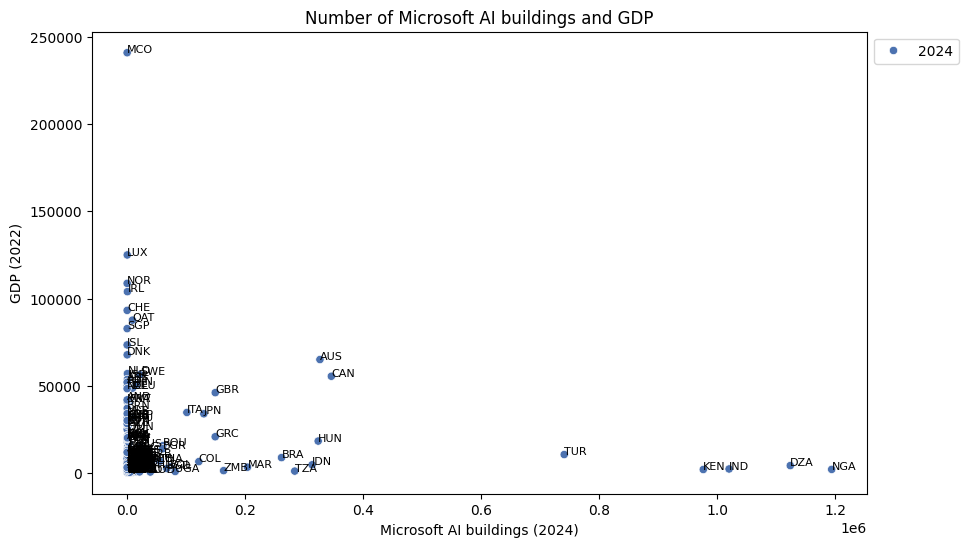

In [38]:
# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# a scatter plot of the number of AI buildings and gdp for the year 2022
sns.scatterplot(data=df_ai_blds_gdp_2024, x="num_of_blds", y="2022", hue="blds_year", palette="deep")

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate data points with labels
for i in range(len(df_ai_blds_gdp_2024)):
    try:
        plt.text(df_ai_blds_gdp_2024['num_of_blds'][i], df_ai_blds_gdp_2024['2022'][i], df_ai_blds_gdp_2024['adm0_iso'][i], fontsize=8)
    except Exception as e:
        # print(e)   
        pass
    else:
        pass

# Set x-axis range
# plt.xlim(0, 1000000)  # Specify your desired range as x_min and x_max
    
plt.title('Number of Microsoft AI buildings and GDP')
plt.ylabel('GDP (2022)')
plt.xlabel('Microsoft AI buildings (2024)')

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

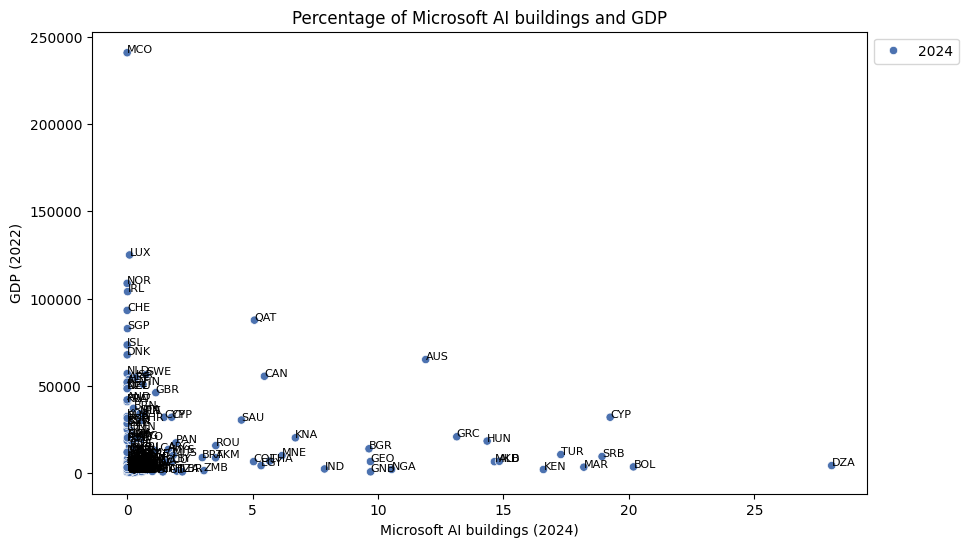

In [39]:
# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# a scatter plot of the number of AI buildings and gdp for the year 2022
sns.scatterplot(data=df_ai_blds_gdp_2024, x="percentage_blds", y="2022", hue="blds_year", palette="deep")

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate data points with labels
for i in range(len(df_ai_blds_gdp_2024)):
    try:
        plt.text(df_ai_blds_gdp_2024['percentage_blds'][i], df_ai_blds_gdp_2024['2022'][i], df_ai_blds_gdp_2024['adm0_iso'][i], fontsize=8)
    except Exception as e:
        # print(e)   
        pass
    else:
        pass

# Set x-axis range
# plt.xlim(0, 1000000)  # Specify your desired range as x_min and x_max
    
plt.title('Percentage of Microsoft AI buildings and GDP')
plt.ylabel('GDP (2022)')
plt.xlabel('Microsoft AI buildings (2024)')

plt.show()

#### 2. version of the scatterplot (GDP)
- more years of the data (2018–2022)
- x-axis: Microsoft AI buildings
- y-axis: selected indicator

In [40]:
# transform the data into needed composition
gdp_years = gdp.melt(id_vars=['Country Name', 'Country Code'], var_name='year', value_name='GDP')
gdp_years

,Country Name,Country Code,year,GDP
0,Aruba,ABW,2018,30918.483584
1,Africa Eastern and Southern,AFE,2018,1558.307482
2,Afghanistan,AFG,2018,492.090632
3,Africa Western and Central,AFW,2018,1735.374911
4,Angola,AGO,2018,2540.508878
...,...,...,...,...
1325,Kosovo,XKX,2022,5340.268798
1326,"Yemen, Rep.",YEM,2022,650.272218
1327,South Africa,ZAF,2022,6766.481254
1328,Zambia,ZMB,2022,1456.901570


In [41]:
# create id_year column in gdp_years df for merging
gdp_years['id_year'] = gdp_years['Country Code'] + gdp_years['year'].astype(str)
gdp_years

,Country Name,Country Code,year,GDP,id_year
0,Aruba,ABW,2018,30918.483584,ABW2018
1,Africa Eastern and Southern,AFE,2018,1558.307482,AFE2018
2,Afghanistan,AFG,2018,492.090632,AFG2018
3,Africa Western and Central,AFW,2018,1735.374911,AFW2018
4,Angola,AGO,2018,2540.508878,AGO2018
...,...,...,...,...,...
1325,Kosovo,XKX,2022,5340.268798,XKX2022
1326,"Yemen, Rep.",YEM,2022,650.272218,YEM2022
1327,South Africa,ZAF,2022,6766.481254,ZAF2022
1328,Zambia,ZMB,2022,1456.901570,ZMB2022


In [42]:
# create id_year column in df_blds_sel df for merging
df_blds_sel['id_year'] = df_blds_sel['adm0_iso'] + df_blds_sel['blds_year'].astype(str)

In [43]:
# merge the df_blds_sel and gdp_years
df_blds_gdp = pd.merge(df_blds_sel, gdp_years, on="id_year", how="left")

In [44]:
# reset the option to view all rows
pd.set_option('display.max_rows', None)

In [45]:
# set the option to view all rows
pd.reset_option('display.max_rows')

In [46]:
# check the dataframe
df_blds_gdp

,name_en,adm0_iso,blds_year,source,num_of_blds,sum_all_blds,percentage_blds,id_year,Country Name,Country Code,year,GDP
0,Indonesia,IDN,2018,remainder,11987966.0,11987966.0,100.0,IDN2018,Indonesia,IDN,2018,3902.661676
1,Indonesia,IDN,2019,remainder,24924151.0,24924151.0,100.0,IDN2019,Indonesia,IDN,2019,4151.227554
2,Indonesia,IDN,2020,remainder,26423299.0,26423299.0,100.0,IDN2020,Indonesia,IDN,2020,3895.618152
3,Indonesia,IDN,2021,remainder,30570946.0,30570946.0,100.0,IDN2021,Indonesia,IDN,2021,4334.215983
4,Indonesia,IDN,2022,remainder,36251875.0,36251875.0,100.0,IDN2022,Indonesia,IDN,2022,4787.999308
...,...,...,...,...,...,...,...,...,...,...,...,...
4349,Scarborough Shoal,-99,2020,source=esri/Google_Africa_Buildings,0.0,0.0,NaN,-992020,NaN,NaN,NaN,NaN
4350,Scarborough Shoal,-99,2021,source=esri/Google_Africa_Buildings,0.0,0.0,NaN,-992021,NaN,NaN,NaN,NaN
4351,Scarborough Shoal,-99,2022,source=esri/Google_Africa_Buildings,0.0,0.0,NaN,-992022,NaN,NaN,NaN,NaN
4352,Scarborough Shoal,-99,2023,source=esri/Google_Africa_Buildings,0.0,0.0,NaN,-992023,NaN,NaN,NaN,NaN


In [47]:
df_blds_gdp.loc[df_blds_gdp['blds_year'] == 2024, ['adm0_iso', 'blds_year', 'year']]

,adm0_iso,blds_year,year
6,IDN,2024,NaN
13,IDN,2024,NaN
20,IDN,2024,NaN
27,MYS,2024,NaN
34,MYS,2024,NaN
...,...,...,...
4325,-99,2024,NaN
4332,-99,2024,NaN
4339,-99,2024,NaN
4346,-99,2024,NaN


In [48]:
# create the df with the manually mapped buildings and gdp data
df_mm_blds_gdp = df_blds_gdp.loc[(df_blds_gdp["source"] == "remainder")
                                 & ~(df_blds_gdp['adm0_iso'] == 'USA') # exclude USA as a extreme value
                                 , :]

In [49]:
# create the df with the ai buildings and gdp data
df_ai_blds_gdp = df_blds_gdp.loc[(df_blds_gdp["source"] == "source=microsoft/BuildingFootprints")
                                 & ~(df_blds_gdp['adm0_iso'] == 'USA') # exclude USA as a extreme value
                                 , :]

In [50]:
# check the columns
df_mm_blds_gdp.columns

Index(['name_en', 'adm0_iso', 'blds_year', 'source', 'num_of_blds',
       'sum_all_blds', 'percentage_blds', 'id_year', 'Country Name',
       'Country Code', 'year', 'GDP'],
      dtype='object')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

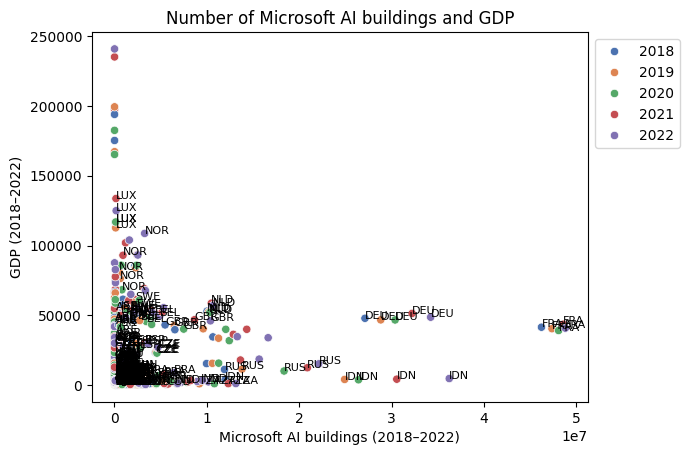

In [51]:
# the scatter plot of the number of manually mapped buildings and gdp in the years 2018-2022
sns.scatterplot(data=df_mm_blds_gdp, x="num_of_blds", y="GDP", hue="year", palette="deep")

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate data points with labels
for i in range(len(df_mm_blds_gdp)):
    try:
        plt.text(df_mm_blds_gdp['num_of_blds'][i], df_mm_blds_gdp['GDP'][i], df_mm_blds_gdp['adm0_iso'][i], fontsize=8)
    except Exception as e:
        # print(e)
        pass
    else:
        pass

plt.title('Number of Microsoft AI buildings and GDP')
plt.ylabel('GDP (2018–2022)')
plt.xlabel('Microsoft AI buildings (2018–2022)')

plt.show()

In [52]:
# the scatter plot of the number of manually mapped buildings and gdp in the years 2018-2022
fig = px.scatter(df_mm_blds_gdp, x="num_of_blds", y="GDP", color="year",
                 #symbol="adm0_iso"
                 hover_name="adm0_iso",)

# Update layout to add title
fig.update_layout(title='Manually mapped buildings X GDP')

fig.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

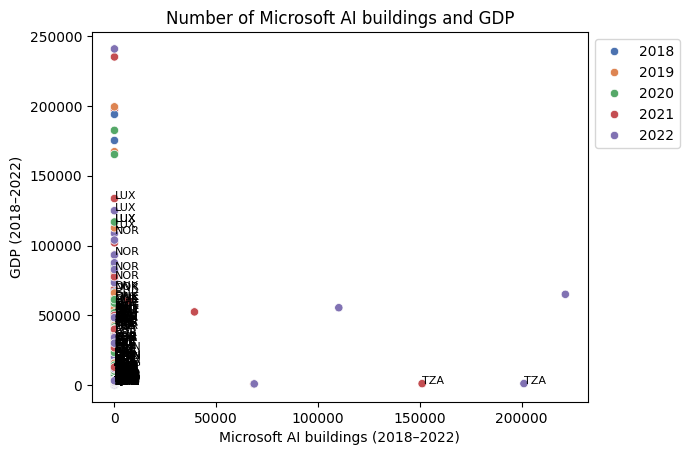

In [53]:
# the scatter plot of the number of ai buildings and gdp in the years 2018-2022
sns.scatterplot(data=df_ai_blds_gdp, x="num_of_blds", y="GDP", hue="year", palette="deep")

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate data points with labels
for i in range(len(df_ai_blds_gdp)):
    try:
        plt.text(df_ai_blds_gdp['num_of_blds'][i], df_ai_blds_gdp['GDP'][i], df_ai_blds_gdp['adm0_iso'][i], fontsize=8)
    except Exception as e:
        # print(e)
        pass
    else:
        pass

plt.title('Number of Microsoft AI buildings and GDP')
plt.ylabel('GDP (2018–2022)')
plt.xlabel('Microsoft AI buildings (2018–2022)')

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

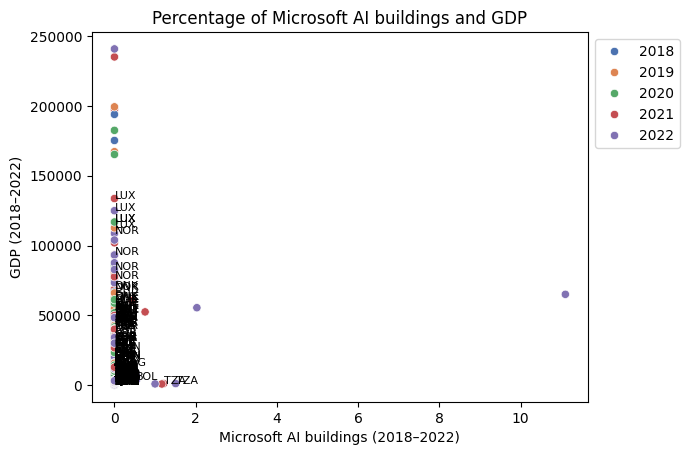

In [54]:
# the scatter plot of the number of ai buildings and gdp in the years 2018-2022
sns.scatterplot(data=df_ai_blds_gdp, x="percentage_blds", y="GDP", hue="year", palette="deep")

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate data points with labels
for i in range(len(df_ai_blds_gdp)):
    try:
        plt.text(df_ai_blds_gdp['percentage_blds'][i], df_ai_blds_gdp['GDP'][i], df_ai_blds_gdp['adm0_iso'][i], fontsize=8)
    except Exception as e:
        # print(e)
        pass
    else:
        pass

plt.title('Percentage of Microsoft AI buildings and GDP')
plt.ylabel('GDP (2018–2022)')
plt.xlabel('Microsoft AI buildings (2018–2022)')

plt.show()

In [55]:
# the scatter plot of the number of ai buildings and gdp in the years 2018-2022
fig = px.scatter(df_ai_blds_gdp, x="num_of_blds", y="GDP", color="year",
                 #symbol="adm0_iso"
                 hover_name="adm0_iso",)

# Update layout to add title
fig.update_layout(title='Number of Microsoft AI buildings X GDP')

fig.show()

In [56]:
# the scatter plot of the portion of the number of ai buildings and gdp in the years 2018-2022
fig = px.scatter(df_ai_blds_gdp, x="percentage_blds", y="GDP", color="year",
                 #symbol="adm0_iso"
                 hover_name="adm0_iso",)

# Update layout to add title
fig.update_layout(title='Percentage of Microsoft AI buildings X GDP')

fig.show()

In [57]:
# check the number of countries with the number of ai buildings > 0 and without NaN values
temp_gdp = df_ai_blds_gdp.loc[(df_ai_blds_gdp["num_of_blds"] > 0)
                   & (pd.notna(df_ai_blds_gdp["num_of_blds"]))
                   & (pd.notna(df_ai_blds_gdp["GDP"])), :]

print(f'Number of countries: {len(temp_gdp)}')
temp_gdp

Number of countries: 22


,name_en,adm0_iso,blds_year,source,num_of_blds,sum_all_blds,percentage_blds,id_year,Country Name,Country Code,year,GDP
74,Bolivia,BOL,2022,source=microsoft/BuildingFootprints,1454.0,270086.0,0.538347,BOL2022,Bolivia,BOL,2022,3600.121635
116,Argentina,ARG,2022,source=microsoft/BuildingFootprints,1469.0,739971.0,0.198521,ARG2022,Argentina,ARG,2022,13650.604629
325,Kenya,KEN,2021,source=microsoft/BuildingFootprints,12.0,2359167.0,0.000509,KEN2021,Kenya,KEN,2021,2069.661129
326,Kenya,KEN,2022,source=microsoft/BuildingFootprints,59.0,2605700.0,0.002264,KEN2022,Kenya,KEN,2022,2099.301938
346,Malawi,MWI,2021,source=microsoft/BuildingFootprints,9.0,1771858.0,0.000508,MWI2021,Malawi,MWI,2021,633.609733
347,Malawi,MWI,2022,source=microsoft/BuildingFootprints,11.0,1898089.0,0.000580,MWI2022,Malawi,MWI,2022,645.158692
367,Tanzania,TZA,2021,source=microsoft/BuildingFootprints,151091.0,12477697.0,1.210889,TZA2021,Tanzania,TZA,2021,1146.031982
368,Tanzania,TZA,2022,source=microsoft/BuildingFootprints,201082.0,13343807.0,1.506931,TZA2022,Tanzania,TZA,2022,1192.766479
641,Democratic Republic of the Congo,COD,2022,source=microsoft/BuildingFootprints,395.0,5579918.0,0.007079,COD2022,"Congo, Dem. Rep.",COD,2022,653.656223
2006,Nigeria,NGA,2022,source=microsoft/BuildingFootprints,27.0,7238508.0,0.000373,NGA2022,Nigeria,NGA,2022,2162.633734


### Buildings X HDI

#### 1. version of the scatterplot (HDI)
- one year of the data (2021)
- x-axis: Microsoft AI buildings
- y-axis: selected indicator

##### Transform the data

In [58]:
hdi

,iso3,country,hdicode,region,hdi_2018,hdi_2019,hdi_2020,hdi_2021
0,AFG,Afghanistan,Low,SA,0.483,0.488,0.483,0.478
1,AGO,Angola,Medium,SSA,0.595,0.595,0.590,0.586
2,ALB,Albania,High,ECA,0.806,0.810,0.794,0.796
3,AND,Andorra,Very High,NaN,0.872,0.873,0.848,0.858
4,ARE,United Arab Emirates,Very High,AS,0.909,0.920,0.912,0.911
...,...,...,...,...,...,...,...,...
201,ZZG.ECA,Europe and Central Asia,NaN,NaN,0.798,0.802,0.793,0.796
202,ZZH.LAC,Latin America and the Caribbean,NaN,NaN,0.766,0.768,0.755,0.754
203,ZZI.SA,South Asia,NaN,NaN,0.640,0.641,0.638,0.632
204,ZZJ.SSA,Sub-Saharan Africa,NaN,NaN,0.547,0.552,0.549,0.547


In [59]:
# select the gdp data from the year 2022 and create the df
hdi_2021 = hdi[['country', 'iso3', 'hdi_2021']]
hdi_2021

,country,iso3,hdi_2021
0,Afghanistan,AFG,0.478
1,Angola,AGO,0.586
2,Albania,ALB,0.796
3,Andorra,AND,0.858
4,United Arab Emirates,ARE,0.911
...,...,...,...
201,Europe and Central Asia,ZZG.ECA,0.796
202,Latin America and the Caribbean,ZZH.LAC,0.754
203,South Asia,ZZI.SA,0.632
204,Sub-Saharan Africa,ZZJ.SSA,0.547


In [60]:
df_blds_sel

,name_en,adm0_iso,blds_year,source,num_of_blds,sum_all_blds,percentage_blds,id_year
0,Indonesia,IDN,2018,remainder,11987966.0,11987966.0,100.0,IDN2018
1,Indonesia,IDN,2019,remainder,24924151.0,24924151.0,100.0,IDN2019
2,Indonesia,IDN,2020,remainder,26423299.0,26423299.0,100.0,IDN2020
3,Indonesia,IDN,2021,remainder,30570946.0,30570946.0,100.0,IDN2021
4,Indonesia,IDN,2022,remainder,36251875.0,36251875.0,100.0,IDN2022
...,...,...,...,...,...,...,...,...
4349,Scarborough Shoal,-99,2020,source=esri/Google_Africa_Buildings,0.0,0.0,NaN,-992020
4350,Scarborough Shoal,-99,2021,source=esri/Google_Africa_Buildings,0.0,0.0,NaN,-992021
4351,Scarborough Shoal,-99,2022,source=esri/Google_Africa_Buildings,0.0,0.0,NaN,-992022
4352,Scarborough Shoal,-99,2023,source=esri/Google_Africa_Buildings,0.0,0.0,NaN,-992023


In [61]:
# select the ai blds data from the year 2024 and create the df
ai_blds_2024 = df_blds_sel.loc[(df_blds_sel['blds_year'] == 2024)
           & (df_blds_sel['source'] == "source=microsoft/BuildingFootprints")
           & ~(df_blds_gdp['adm0_iso'] == 'USA') # exclude USA as a extreme value
           , :]

In [62]:
# check the number of buildings by country in the year 2021
ai_blds_2024.groupby(['name_en', 'adm0_iso']).agg({'num_of_blds': 'sum'}).reset_index()

,name_en,adm0_iso,num_of_blds
0,Abkhazia,GEO,37248.0
1,Afghanistan,AFG,3557.0
2,Albania,ALB,42081.0
3,Algeria,DZA,1123493.0
4,Andorra,AND,0.0
...,...,...,...
203,Wake Island,-99,0.0
204,Western Sahara,B28,0.0
205,Yemen,YEM,569.0
206,Zambia,ZMB,163473.0


In [63]:
# check how many countries have buildings in the year 2024
len(ai_blds_2024.loc[~(ai_blds_2024['num_of_blds'] == 0), :])

170

In [64]:
# set the option to view all rows
pd.set_option('display.max_rows', None)

In [65]:
# reset the option to view all rows
pd.reset_option('display.max_rows')

In [66]:
# sort the ai_blds_2022 by name_en
ai_blds_2024.sort_values(by="name_en", ascending=True)

,name_en,adm0_iso,blds_year,source,num_of_blds,sum_all_blds,percentage_blds,id_year
1231,Abkhazia,GEO,2024,source=microsoft/BuildingFootprints,37248.0,384034.0,9.699141,GEO2024
2638,Afghanistan,AFG,2024,source=microsoft/BuildingFootprints,3557.0,1792515.0,0.198436,AFG2024
1273,Albania,ALB,2024,source=microsoft/BuildingFootprints,42081.0,283599.0,14.838205,ALB2024
2470,Algeria,DZA,2024,source=microsoft/BuildingFootprints,1123493.0,4000350.0,28.084868,DZA2024
2617,Andorra,AND,2024,source=microsoft/BuildingFootprints,0.0,5654.0,0.000000,AND2024
...,...,...,...,...,...,...,...,...
4304,Wake Island,-99,2024,source=microsoft/BuildingFootprints,0.0,47.0,0.000000,-992024
559,Western Sahara,B28,2024,source=microsoft/BuildingFootprints,0.0,1768.0,0.000000,B282024
3282,Yemen,YEM,2024,source=microsoft/BuildingFootprints,569.0,430033.0,0.132315,YEM2024
1630,Zambia,ZMB,2024,source=microsoft/BuildingFootprints,163473.0,5339150.0,3.061779,ZMB2024


In [67]:
# merge the ai_blds_2021 and gdp_2024
df_ai_blds_hdi_2024 = ai_blds_2024.merge(hdi_2021, left_on="adm0_iso", right_on="iso3", how="left")

In [68]:
# check the columns
df_ai_blds_hdi_2024.columns

Index(['name_en', 'adm0_iso', 'blds_year', 'source', 'num_of_blds',
       'sum_all_blds', 'percentage_blds', 'id_year', 'country', 'iso3',
       'hdi_2021'],
      dtype='object')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

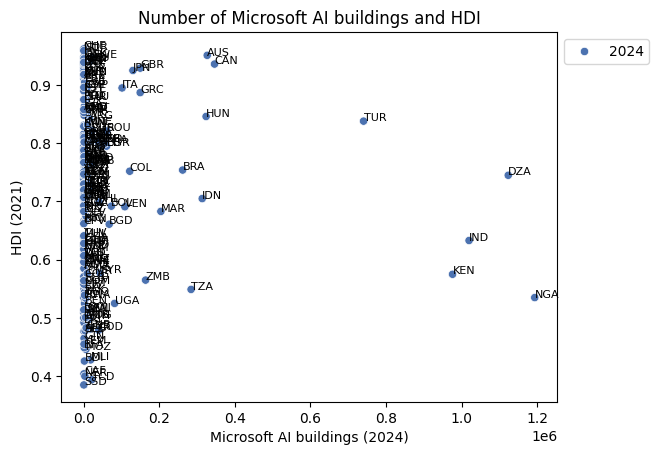

In [69]:
# Scatter plot of the number of AI buildings and HDI for the year 2021/2024
sns.scatterplot(data=df_ai_blds_hdi_2024, x="num_of_blds", y="hdi_2021", hue="blds_year", palette="deep")

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate data points with labels
for i in range(len(df_ai_blds_hdi_2024)):
    plt.text(df_ai_blds_hdi_2024['num_of_blds'][i], df_ai_blds_hdi_2024['hdi_2021'][i], df_ai_blds_hdi_2024['adm0_iso'][i], fontsize=8)

plt.title('Number of Microsoft AI buildings and HDI')
plt.ylabel('HDI (2021)')
plt.xlabel('Microsoft AI buildings (2024)')

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

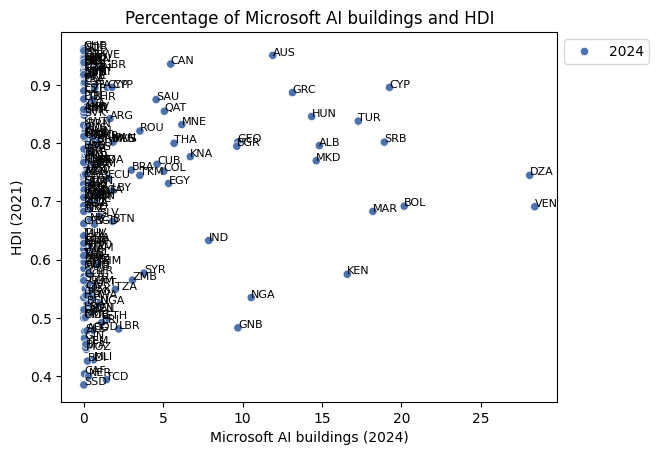

In [70]:
# Scatter plot of the number of AI buildings and HDI for the year 2021/2024
sns.scatterplot(data=df_ai_blds_hdi_2024, x="percentage_blds", y="hdi_2021", hue="blds_year", palette="deep")

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate data points with labels
for i in range(len(df_ai_blds_hdi_2024)):
    plt.text(df_ai_blds_hdi_2024['percentage_blds'][i], df_ai_blds_hdi_2024['hdi_2021'][i], df_ai_blds_hdi_2024['adm0_iso'][i], fontsize=8)

plt.title('Percentage of Microsoft AI buildings and HDI')
plt.ylabel('HDI (2021)')
plt.xlabel('Microsoft AI buildings (2024)')

plt.show()

In [71]:
# Scatter plot of the number of AI buildings and HDI for the year 2021/2024
fig = px.scatter(df_ai_blds_hdi_2024, x="num_of_blds", y="hdi_2021",
                 #color="blds_year",
                 #symbol="adm0_iso"
                 hover_name="adm0_iso",)


# Update layout to add title
fig.update_layout(title='Number of Microsoft AI buildings X HDI')

fig.show()

In [72]:
# Scatter plot of the number of AI buildings and HDI for the year 2021/2024
fig = px.scatter(df_ai_blds_hdi_2024, x="percentage_blds", y="hdi_2021",
                 #color="blds_year",
                 #symbol="adm0_iso"
                 hover_name="adm0_iso",)

# Update layout to add title
fig.update_layout(title='Percentage of Microsoft AI buildings X HDI')

fig.show()

#### 2. version of the scatterplot (HDI)
- more years of the data (2018–2022)
- x-axis: Microsoft AI buildings
- y-axis: selected indicator

In [73]:
# transform the data into needed composition
hdi_years = hdi.melt(id_vars=['iso3', 'country', 'hdicode', 'region'], var_name='year', value_name='HDI')
hdi_years

,iso3,country,hdicode,region,year,HDI
0,AFG,Afghanistan,Low,SA,hdi_2018,0.483
1,AGO,Angola,Medium,SSA,hdi_2018,0.595
2,ALB,Albania,High,ECA,hdi_2018,0.806
3,AND,Andorra,Very High,NaN,hdi_2018,0.872
4,ARE,United Arab Emirates,Very High,AS,hdi_2018,0.909
...,...,...,...,...,...,...
819,ZZG.ECA,Europe and Central Asia,NaN,NaN,hdi_2021,0.796
820,ZZH.LAC,Latin America and the Caribbean,NaN,NaN,hdi_2021,0.754
821,ZZI.SA,South Asia,NaN,NaN,hdi_2021,0.632
822,ZZJ.SSA,Sub-Saharan Africa,NaN,NaN,hdi_2021,0.547


In [74]:
# function extraction of the year from the year column
def year_extraction(row):
    return row['year'].split("_")[1]

# apply the function to the hdi_years df
hdi_years['year'] = hdi_years.apply(year_extraction, axis=1)

# convert col year from object data type to datetype
hdi_years['year'] = pd.to_datetime(hdi_years['year'], format='%Y').dt.year

In [75]:
hdi_years

,iso3,country,hdicode,region,year,HDI
0,AFG,Afghanistan,Low,SA,2018,0.483
1,AGO,Angola,Medium,SSA,2018,0.595
2,ALB,Albania,High,ECA,2018,0.806
3,AND,Andorra,Very High,NaN,2018,0.872
4,ARE,United Arab Emirates,Very High,AS,2018,0.909
...,...,...,...,...,...,...
819,ZZG.ECA,Europe and Central Asia,NaN,NaN,2021,0.796
820,ZZH.LAC,Latin America and the Caribbean,NaN,NaN,2021,0.754
821,ZZI.SA,South Asia,NaN,NaN,2021,0.632
822,ZZJ.SSA,Sub-Saharan Africa,NaN,NaN,2021,0.547


In [76]:
hdi_years.dtypes

iso3        object
country     object
hdicode     object
region      object
year         int32
HDI        float64
dtype: object

In [77]:
# create id_year column in hdi_years df for merging
hdi_years['id_year'] = hdi_years['iso3'] + hdi_years['year'].astype(str)
hdi_years

,iso3,country,hdicode,region,year,HDI,id_year
0,AFG,Afghanistan,Low,SA,2018,0.483,AFG2018
1,AGO,Angola,Medium,SSA,2018,0.595,AGO2018
2,ALB,Albania,High,ECA,2018,0.806,ALB2018
3,AND,Andorra,Very High,NaN,2018,0.872,AND2018
4,ARE,United Arab Emirates,Very High,AS,2018,0.909,ARE2018
...,...,...,...,...,...,...,...
819,ZZG.ECA,Europe and Central Asia,NaN,NaN,2021,0.796,ZZG.ECA2021
820,ZZH.LAC,Latin America and the Caribbean,NaN,NaN,2021,0.754,ZZH.LAC2021
821,ZZI.SA,South Asia,NaN,NaN,2021,0.632,ZZI.SA2021
822,ZZJ.SSA,Sub-Saharan Africa,NaN,NaN,2021,0.547,ZZJ.SSA2021


In [78]:
# create id_year column in df_blds_sel df for merging
df_blds_sel['id_year'] = df_blds_sel['adm0_iso'] + df_blds_sel['blds_year'].astype(str)

In [79]:
# merge the df_blds_sel and gdp_years
df_blds_hdi = pd.merge(df_blds_sel, hdi_years, on="id_year", how="left")

In [80]:
# reset the option to view all rows
pd.set_option('display.max_rows', None)

In [81]:
# set the option to view all rows
pd.reset_option('display.max_rows')

In [82]:
# check the dataframe
df_blds_hdi

,name_en,adm0_iso,blds_year,source,num_of_blds,sum_all_blds,percentage_blds,id_year,iso3,country,hdicode,region,year,HDI
0,Indonesia,IDN,2018,remainder,11987966.0,11987966.0,100.0,IDN2018,IDN,Indonesia,High,EAP,2018.0,0.710
1,Indonesia,IDN,2019,remainder,24924151.0,24924151.0,100.0,IDN2019,IDN,Indonesia,High,EAP,2019.0,0.716
2,Indonesia,IDN,2020,remainder,26423299.0,26423299.0,100.0,IDN2020,IDN,Indonesia,High,EAP,2020.0,0.709
3,Indonesia,IDN,2021,remainder,30570946.0,30570946.0,100.0,IDN2021,IDN,Indonesia,High,EAP,2021.0,0.705
4,Indonesia,IDN,2022,remainder,36251875.0,36251875.0,100.0,IDN2022,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349,Scarborough Shoal,-99,2020,source=esri/Google_Africa_Buildings,0.0,0.0,NaN,-992020,NaN,NaN,NaN,NaN,NaN,NaN
4350,Scarborough Shoal,-99,2021,source=esri/Google_Africa_Buildings,0.0,0.0,NaN,-992021,NaN,NaN,NaN,NaN,NaN,NaN
4351,Scarborough Shoal,-99,2022,source=esri/Google_Africa_Buildings,0.0,0.0,NaN,-992022,NaN,NaN,NaN,NaN,NaN,NaN
4352,Scarborough Shoal,-99,2023,source=esri/Google_Africa_Buildings,0.0,0.0,NaN,-992023,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# create the df with the manually mapped buildings and gdp data
df_mm_blds_hdi = df_blds_hdi.loc[(df_blds_hdi["source"] == "remainder")
                                 & ~(df_blds_gdp['adm0_iso'] == 'USA') # exclude USA as a extreme value
                                 , :]

In [84]:
# create the df with the ai buildings and gdp data
df_ai_blds_hdi = df_blds_hdi.loc[(df_blds_hdi["source"] == "source=microsoft/BuildingFootprints")
                                 & ~(df_blds_gdp['adm0_iso'] == 'USA') # exclude USA as a extreme value
                                 , :]

In [85]:
# check the columns
df_mm_blds_hdi.columns

Index(['name_en', 'adm0_iso', 'blds_year', 'source', 'num_of_blds',
       'sum_all_blds', 'percentage_blds', 'id_year', 'iso3', 'country',
       'hdicode', 'region', 'year', 'HDI'],
      dtype='object')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

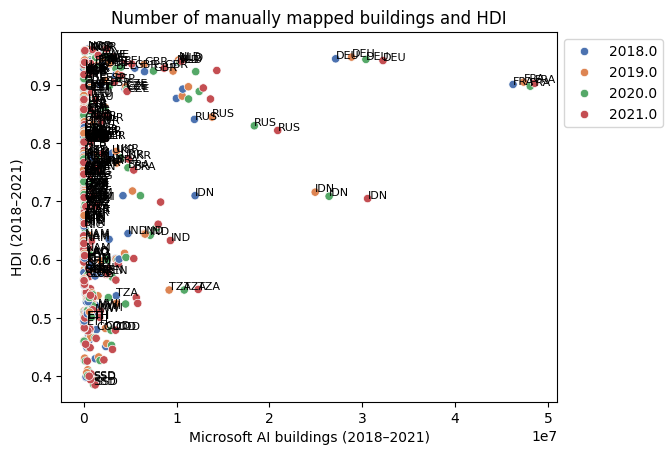

In [86]:
# the scatter plot of the number of manually mapped buildings and hdi in the years 2018-2021
sns.scatterplot(data=df_mm_blds_hdi, x="num_of_blds", y="HDI", hue="year", palette="deep")

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate data points with labels
for i in range(len(df_mm_blds_hdi)):
    try:
        plt.text(df_mm_blds_hdi['num_of_blds'][i], df_mm_blds_hdi['HDI'][i], df_mm_blds_hdi['adm0_iso'][i], fontsize=8)
    except Exception as e:
        # print(e)
        pass
    else:
        pass

plt.title('Number of manually mapped buildings and HDI')
plt.ylabel('HDI (2018–2021)')
plt.xlabel('Microsoft AI buildings (2018–2021)')

plt.show()

In [87]:
# convert the year column to string
df_mm_blds_hdi.loc[: ,'year'] = df_mm_blds_hdi['year'].astype(str)

# the scatter plot of the number of manually mapped buildings and hdi in the years 2018-2022
fig = px.scatter(df_mm_blds_hdi, x="num_of_blds", y="HDI",
                 color="year",
                 #symbol="adm0_iso"
                 hover_name="adm0_iso",)

# Update layout to add title
fig.update_layout(title='Number of manually mapped buildings X HDI')

fig.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

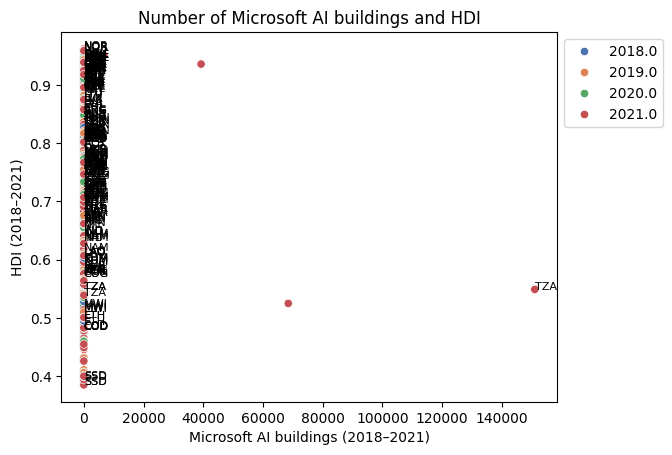

In [88]:
# the scatter plot of the number of ai buildings and hdi in the years 2018-2022
sns.scatterplot(data=df_ai_blds_hdi, x="num_of_blds", y="HDI", hue="year", palette="deep")

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate data points with labels
for i in range(len(df_ai_blds_hdi)):
    try:
        plt.text(df_ai_blds_hdi['num_of_blds'][i], df_ai_blds_hdi['HDI'][i], df_ai_blds_hdi['adm0_iso'][i], fontsize=8)
    except Exception as e:
        # print(e)
        pass
    else:
        pass

plt.title('Number of Microsoft AI buildings and HDI')
plt.ylabel('HDI (2018–2021)')
plt.xlabel('Microsoft AI buildings (2018–2021)')

plt.show()

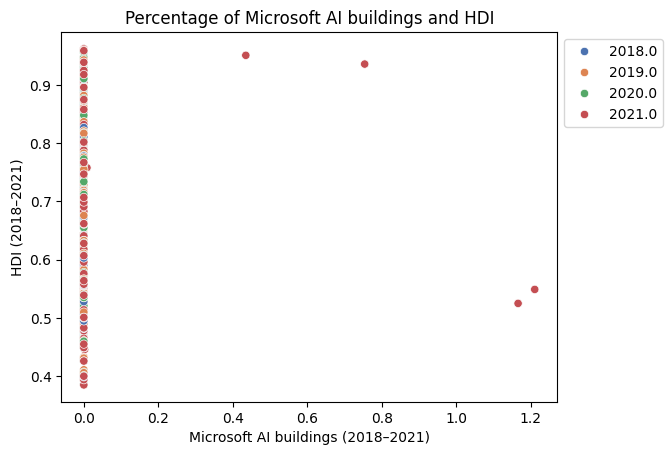

In [89]:
# the scatter plot of the number of ai buildings and hdi in the years 2018-2024
sns.scatterplot(data=df_ai_blds_hdi, x="percentage_blds", y="HDI", hue="year", palette="deep")

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate data points with labels
for i in range(len(df_ai_blds_hdi)):
    try:
        plt.text(df_ai_blds_hdi['percentge_blds'][i], df_ai_blds_hdi['HDI'][i], df_ai_blds_hdi['adm0_iso'][i], fontsize=8)
    except Exception as e:
        # print(e)
        pass
    else:
        pass

plt.title('Percentage of Microsoft AI buildings and HDI')
plt.ylabel('HDI (2018–2021)')
plt.xlabel('Microsoft AI buildings (2018–2021)')

plt.show()

In [90]:
# convert the year column to string
df_ai_blds_hdi.loc[:, 'year'] = df_ai_blds_hdi['year'].astype(str)

# the scatter plot of the number of manually mapped buildings and hdi in the years 2018-2024
fig = px.scatter(df_ai_blds_hdi, x="num_of_blds", y="HDI",
                 color="year",
                 hover_name="adm0_iso")

# Update layout to add title
fig.update_layout(title='Number of Microsoft AI buildings X HDI')


fig.show()


In [91]:
# convert the year column to string
df_ai_blds_hdi.loc[:, 'year'] = df_ai_blds_hdi['year'].astype(str)

# the scatter plot of the number of manually mapped buildings and hdi in the years 2018-2024
fig = px.scatter(df_ai_blds_hdi, x="percentage_blds", y="HDI",
                 color="year",
                 hover_name="adm0_iso")

# Update layout to add title
fig.update_layout(title='Percentage of Microsoft AI buildings X HDI')


fig.show()


In [92]:
# check the number of countries with the number of ai buildings > 0 and without NaN values
temp_hdi = df_ai_blds_hdi.loc[(df_ai_blds_hdi["num_of_blds"] > 0)
                   & (pd.notna(df_ai_blds_hdi["num_of_blds"]))
                   & (pd.notna(df_ai_blds_hdi["HDI"])), :]

print(f'Number of countries: {len(temp_hdi)}')
temp_hdi

Number of countries: 8


,name_en,adm0_iso,blds_year,source,num_of_blds,sum_all_blds,percentage_blds,id_year,iso3,country,hdicode,region,year,HDI
325,Kenya,KEN,2021,source=microsoft/BuildingFootprints,12.0,2359167.0,0.000509,KEN2021,KEN,Kenya,Medium,SSA,2021.0,0.575
346,Malawi,MWI,2021,source=microsoft/BuildingFootprints,9.0,1771858.0,0.000508,MWI2021,MWI,Malawi,Low,SSA,2021.0,0.512
367,Tanzania,TZA,2021,source=microsoft/BuildingFootprints,151091.0,12477697.0,1.210889,TZA2021,TZA,Tanzania (United Republic of),Low,SSA,2021.0,0.549
2488,Mozambique,MOZ,2021,source=microsoft/BuildingFootprints,65.0,3085768.0,0.002106,MOZ2021,MOZ,Mozambique,Low,SSA,2021.0,0.446
2698,Uganda,UGA,2021,source=microsoft/BuildingFootprints,68507.0,5874523.0,1.166171,UGA2021,UGA,Uganda,Low,SSA,2021.0,0.525
3132,Canada,CAN,2021,source=microsoft/BuildingFootprints,39290.0,5209360.0,0.754219,CAN2021,CAN,Canada,Very High,NaN,2021.0,0.936
3153,Mexico,MEX,2021,source=microsoft/BuildingFootprints,94.0,1123846.0,0.008364,MEX2021,MEX,Mexico,High,LAC,2021.0,0.758
3503,Australia,AUS,2021,source=microsoft/BuildingFootprints,6767.0,1555619.0,0.435004,AUS2021,AUS,Australia,Very High,NaN,2021.0,0.951
